# To Do
- group by user_name to get more accurate topics/sentiment

# Imports and Helper Functions

In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size':16})
twitter_color='#1DA1F2'

# Data Loading

In [238]:
raw_data_old = pd.read_csv('vaccination_all_tweets.csv')
# # raw_data = pd.read_csv('clean_data_11-11_2_checkpoint.csv', index_col=0)
print(raw_data_old.shape)
raw_data_old.head()
raw_data_old['date'] = pd.to_datetime(raw_data_old.date)

(212982, 16)


In [245]:
int(((max(x)-min(x))/7).days)

45

In [250]:
import datetime as dt


datetime.date(2020, 8, 23)

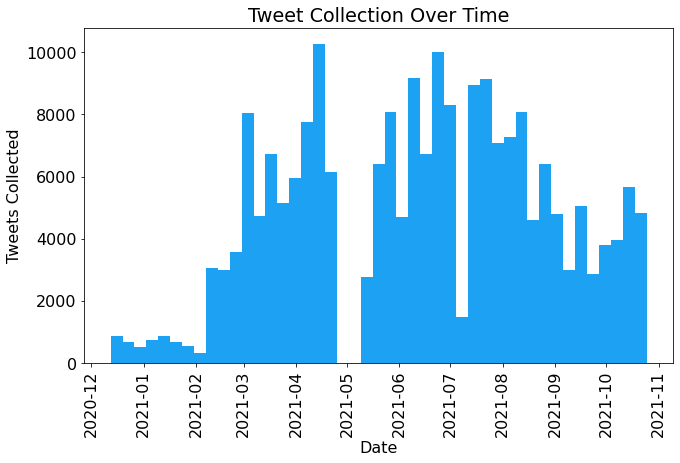

In [351]:
x = raw_data_old.date
y = 1

plt.figure(figsize=(10,6));
plt.hist(x, bins=int(((max(x)-min(x))/7).days), color=twitter_color);
plt.xlabel('Date')
plt.ylabel('Tweets Collected')
ymin, ymax = plt.ylim();
# plt.vlines(x=dt.date(2020, 12, 11), ymin=ymin, ymax=ymax, linestyles='--', label='Pfizer Vaccine Approved', colors=['r'])
# plt.vlines(x=dt.date(2020, 12, 17), ymin=ymin, ymax=ymax, linestyles='--', label='Moderna Vaccine Approved', colors=['b'])
# plt.vlines(x=dt.date(2021, 2, 27), ymin=ymin, ymax=ymax, linestyles='--', label='J&J Vaccine Approved', colors=['g'])
plt.title('Tweet Collection Over Time');
plt.tight_layout();
plt.xticks(rotation=90);
# plt.legend();
plt.savefig('tweet_collection_over_time.png', dpi=300, bbox_inches='tight')

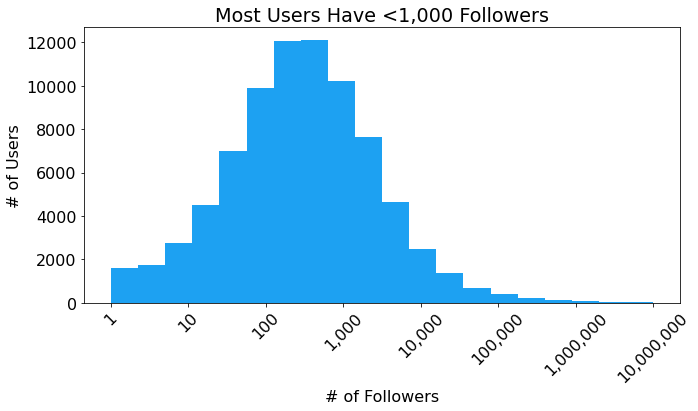

In [344]:
x = raw_data_old.groupby('user_name').user_followers.agg('max')
y = 1

plt.figure(figsize=(10,6));
plt.hist(np.log10(x), range=(0, 7),bins=20, log=False, color=twitter_color);
# plt.hist(x, range=(0,10**5), bins=50, log=True);
plt.xlabel('# of Followers')
plt.ylabel('# of Users')
# plt.ylim((0,1000))
ymin, ymax = plt.ylim();
plt.xticks(ticks=[0,1,2,3,4,5,6,7], labels=["1", "10", "100", "1,000", "10,000", "100,000", "1,000,000", "10,000,000"], rotation=45)
plt.title('Most Users Have <1,000 Followers');
plt.tight_layout();
# plt.legend();
# plt.savefig('user_vs_followers.png', dpi=300)

In [328]:
print(np.median(x))

275.0


In [274]:
print(len(raw_data_old.user_name.unique()))

80614


In [ ]:
pd.Series().any()

In [350]:
raw_data_old.groupby('user_name').user_verified.agg(any).sum()/len(raw_data.user_name.unique())

0.03482630272952854

In [275]:
raw_data_old.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email comments/ideas to charles@charlesadlertonight.ca",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


# Preprocessing

## Clean Text

In [85]:
stemmer = nltk.stem.lancaster.LancasterStemmer()

In [86]:
from spellchecker import SpellChecker
spell = SpellChecker()

spell.correction('hellio')

'hello'

In [374]:
# filter out some nonsense
import re

def clean_text(series, stemmer=None, spellchecker=None):
    
    s1 = series.copy()
    #remove #tags, urls, numbers, ellipsis (along with the partial word before them), and punctuation
    pat = re.compile(r'\\n|#\w*|http\S*|\d+|\s\S*\u2026|[^\w|\s]+') 
    s1 = s1.apply(lambda s: pat.sub(' ', s, 0).lower())
    
    if stemmer:
        print('Stemmer being used...')
        if spellchecker:
            print('Spellchecker being used...')
            s1 = s1.apply(lambda s: ' '.join(stemmer.stem(spellchecker.correction(word)) for word in s.split()))
        else:
            print('Spellchecker not applied...')
            s1 = s1.apply(lambda s: ' '.join(stemmer.stem(word) for word in s.split()))
            
    elif spellchecker:
        s1 = s1.apply(lambda s: ' '.join(spellchecker.correction(word) for word in s.split()))
        
    return s1

raw_data['clean_text'] = clean_text(raw_data.text, stemmer=stemmer)
raw_data[['text', 'clean_text']].head()

Stemmer being used...
Spellchecker not applied...


,text,clean_text
0,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,sam folk said daikon past could tre a cytokin storm
1,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",whil the world has been on the wrong sid of hist thi year hop the biggest vaccin effort we ve
2,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,russ vaccin is cre to last
3,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",fact ar immut sen ev when you re not eth sturdy enough to acknowledg them you wer born
4,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,explain to me again why we nee a vaccin borisjohnson matthancock


In [373]:
' '.join(stemmer.stem(word) for word in 'runners saying to the zoo created pushing'.split())

'run say to the zoo cre push'

In [540]:
test = ''
for word in neg_tweets2.loc[9, 'clean_text'].split():
    if word not in stop_words:
        test += (word+' ')
test

'tragedy anoth lif tak corp gree evil pharmaceut company '

In [529]:
raw_data[['text', 'clean_text']].loc[423]

text          It’s a great day for science. ☀️#PfizerBioNTech
clean_text              it s a gre day for sci pfizerbiontech
Name: 423, dtype: object

In [ ]:
neg_

In [539]:
neg_tweets2[['text', 'clean_text']][:50]

,text,clean_text
0,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",whil the world has been on the wrong sid of hist thi year hop the biggest vaccin effort we ve
1,"while deaths are closing in on the 300,000 mark... millions of people wait #PfizerBioNTech #Vaccine !\n-\nThe first U… https://t.co/uQ3A2f7SVP",whil death ar clos in on the mark mil of peopl wait the first
2,.@Pfizer will rake in billions from its expensive #CovidVaccine but @AlbertBourla refuses to cut the price for lowe… https://t.co/eC94w3TUl0,pfiz wil rak in bil from it expend but albertbourl refus to cut the pric for
3,"The trump administration failed to deliver on vaccine promises, *shocker* #COVIDIOTS #coronavirus #CovidVaccine… https://t.co/hew6eHTUrD",the trump admin fail to del on vaccin prom shock
4,No.1 of 2 done.\n\n#ThankYouNHS @NHSuk @MHRAgovuk and #PfizerBioNTech @pfizer for making the #CovidVaccine dream poss… https://t.co/3KvJ7UP432,no of don nhsuk mhragovuk and pfiz for mak the dream
5,"@ZubyMusic 6 deaths so far. \nIt's only death, nothing to worry about then 🤔\n#CovidVaccines\n#Pfizervaccine… https://t.co/HkGTDM5J3f",zubymus death so far it s on dea noth to worry about then
6,@sbnumb3 @nytimes Please don’t spread fake news! There is no evidence that these cases are linked to the… https://t.co/bMcAhIPR5g,sbnumb nytim pleas don t spread fak new ther is no evid that thes cas ar link to
7,"The #FDA finally issues #EUA now comes the problem transporting this #PfizerBioNTech vaccine, needs to be kept at -… https://t.co/NvaGyoo2yD",the fin issu now com the problem transport thi vaccin nee to be kept at
8,"When The #CovidVaccine \nPoisons Enough Of The LEFT With ""Side Effects"" Like #BellsPalsy Or ☠️ As They Are Flocking… https://t.co/mGNvf2XT8i",when the poison enough of the left with sid effect lik or as they ar
9,Tragedy. Another life taken by corporate greed and the evil pharmaceutical companies. #vaccination #vaccine… https://t.co/1YcShyQpR6,tragedy anoth lif tak by corp gree and the evil pharmaceut company


In [538]:
raw_data[['text', 'clean_text']][500:550]

,text,clean_text
506,40 percent increase in EXISTING @pfizer and @BioNTech_Group VACCINE supply! The vials already provided contain up t… https://t.co/jkZ2B2Fu7l,perc increas in ex pfiz and biontech_group vaccin supply the vial already provid contain up
507,Me waking up the day after getting the vaccine. \n\n#vaccination #CoronavirusVaccine #Pfizervaccine #COVID19Vaccine… https://t.co/SvY6tGR1Cj,me wak up the day aft get the vaccin
508,"The pfizer vaccine ingredients are in this article, if you're looking for potential allergens.\n\n(MRNA, Lipids, Salt… https://t.co/bgGMno5yen",the pfiz vaccin ingredy ar in thi artic if you re look for pot allerg mrna lipid
509,"It is to determine if it's still safe, effective after storage temperatures dipped below -80°C. #FMTNews… https://t.co/0xS5WilDbZ",it is to determin if it s stil saf effect aft stor temp dip below c
510,Who should be getting the #COVID19 vaccine when it’s available in your locality....? #Pfizervaccine #PfizerBioNTech https://t.co/8IvPJTPRAq,who should be get the vaccin when it s avail in yo loc
511,Got the COVID vaccine today. This is amazing. So happy to be able to get this! Feels like the world is finally turn… https://t.co/B64EjHOtNK,got the covid vaccin today thi is amaz so happy to be abl to get thi feel lik the world is fin
512,Not a good start. Hope she recovers to full health. But this is one of the concerns of a rushed vaccine. #COVID19… https://t.co/krBN63JZ5D,not a good start hop she recov to ful heal but thi is on of the concern of a rush vaccin
513,@GER_OSCE @OSCE @IFSHHamburg @TheGCSP @SokovNikolai #Germany #AngelaMerkel #merkel #osce #fsc #armscontrol thanks e… https://t.co/GqQFaC7yaS,ger_osce osc ifshhamburg thegcsp sokovnikola thank
514,"Vaccinated! Painless injection, and I’m currently cruising social media during the 15 minute observation period.… https://t.co/kxEaaG9BrL",vaccin painless inject and i m cur cru soc med dur the minut observ
515,Second shipment of #PfizerbioNTech #coronavirus #vaccine arrives #Riyadh #KSA Second shipment of Pf... via… https://t.co/Hoc3W6wNd3,second ship of ar second ship of pf


In [376]:
# raw_data.to_csv('clean_data_11-11_3_checkpoint.csv')

In [530]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [223]:
pd.options.display.max_colwidth=500
users_to_drop = ['VaxBLR', 'COVID News', 'Stankevicius International', 'CoWIN Blore 18-44', 'Mr. W. L.', 'CowinBangalore',
                 'Owl 🦉', 'Workout Solutions', 'Owl🦉', 'POST Online Media', 'SPARTONY', 'Craig Gordon', 'ILKHA', 'TRILOK CHRONICLES']
raw_data = raw_data[~raw_data['user_name'].isin(users_to_drop)]
raw_data.tail()
# print(f'{len(raw_data)-len(raw_data_less_users)} rows dropped')

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,clean_text,polarity
212940,1449343823855833088,n♡a♧t♤s♢,NaN,IG: natzchoz ♥️,2012-03-18 03:06:04,4,13,168,False,2021-10-16 11:57:49,"Finally, I’m fully 💉🙌🏼🙂 #SputnikV",['SputnikV'],Twitter for iPhone,0,0,False,finally i m fully,0.0000
212941,1449337238081396736,Gordy Alexander,NaN,True humanist and eco-warrior. And you?,2020-02-14 13:58:27,9,13,251,False,2021-10-16 11:31:39,"@bbchealth Ironic, when #SputnikV appears to be relatively safe and effective 🙄",['SputnikV'],Twitter Web App,0,0,False,bbchealth ironic when appears to be relatively safe and effective,0.6705
212944,1449335476649930756,Sputnik V,"Moscow, Russia","Sputnik V is the world’s first registered COVID-19 vaccine with over 91.6% efficacy, developed by Gamaleya Inst. Authorized in 70 countries.",2020-08-11 09:12:38,885945,155,3580,True,2021-10-16 11:24:39,Nicaragua is one of a growing number of countries that recognize the one-component Sputnik Light as well as the two… https://t.co/ZETizPOMqt,NaN,Twitter Web App,71,430,False,nicaragua is one of a growing number of countries that recognize the one component sputnik light as well as the,0.4767
212968,1449301272373469187,Scott D. Covey,"Johannesburg, South Africa","Canadian Author of Military Fiction worked as a security professional for the Canadian Federal Government, served with the CAF and did security work in Africa.",2011-02-17 21:31:39,2685,1091,237,False,2021-10-16 09:08:44,"I am Canadian, over 50, living in Russia. I was surprised when I got the offer to receive the vaccine. Being a good… https://t.co/J7pXQJTja5",NaN,Twitter for iPhone,0,5,False,i am canadian over living in russia i was surprised when i got the offer to receive the vaccine being a,0.2263
212973,1449278567045468166,Update News 360 English,"India, Tamil Nadu","Update News 360, Instant Updates Of All News Around The World (Entertainment, Politics, Sports, General & Etc...) https://t.co/KPhEf17phu",2020-03-17 11:44:19,620,183,44,False,2021-10-16 07:38:31,Russia struggles to meet global orders for Sputnik V\n\n#coronavirus #COVID19 #SputnikV #vaccination #vaccine \n\nRea… https://t.co/e4TQHvjsCj,"['coronavirus', 'COVID19', 'SputnikV', 'vaccination', 'vaccine']",Twitter Web App,0,0,False,russia struggles to meet global orders for sputnik v rea,-0.3612


## EDA

In [377]:
print(f'Number of tweets: {len(raw_data):,}')
print(f'Number of users: {len(raw_data.user_name.unique()):,}')

Number of tweets: 170,922
Number of users: 80,600


In [92]:
# # check out users with most tweets
# temp = raw_data.user_name.value_counts().sort_values(ascending=False)
# temp.head(50)
# raw_data[raw_data.user_name.isin([temp.index[20]])][['user_name', 'text', 'clean_text']].head(50)

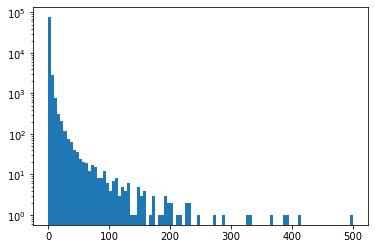

In [93]:
plt.hist(raw_data.user_name.value_counts(), range=[0,500], log=True, bins=100);

In [95]:
by_user_data = raw_data.groupby('user_name', as_index=False).agg('sum')
by_user_data['clean_text'] = raw_data.groupby('user_name', as_index=False)['clean_text'].agg('sum')['clean_text']
by_user_data.head(50)

KeyboardInterrupt: 

In [ ]:
# # save
# by_user_data.to_csv('by_user_data_checkpoint_11-11.csv')
# load
# by_user_data = pd.read_csv('by_user_data_checkpoint_11-10.csv', index_col=0)

In [378]:
raw_data.dropna(subset=['clean_text'], axis=0, inplace=True)
# by_user_data.dropna(subset=['clean_text'], axis=0, inplace=True)
# by_user_data = by_user_data[by_user_data.clean_text!=0]

## Sentiment Analysis

In [379]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

raw_data['polarity'] = raw_data.clean_text.apply(lambda x: sentiment.polarity_scores(x)['compound'])

In [490]:
neg_tweets = raw_data[raw_data.polarity<=-0.05].copy()
neg_tweets2 = neg_tweets.reset_index().copy()

In [406]:
print('Number of Positive: {}'.format(len(raw_data[raw_data.polarity>0.05])))
print('Number of Neutral: {}'.format(len(raw_data[(raw_data.polarity<=0.05)&(raw_data.polarity>-0.05)])))
print('Number of Negative: {}'.format(len(raw_data[raw_data.polarity<=-0.05])))

Number of Positive: 37168
Number of Neutral: 105694
Number of Negative: 28060


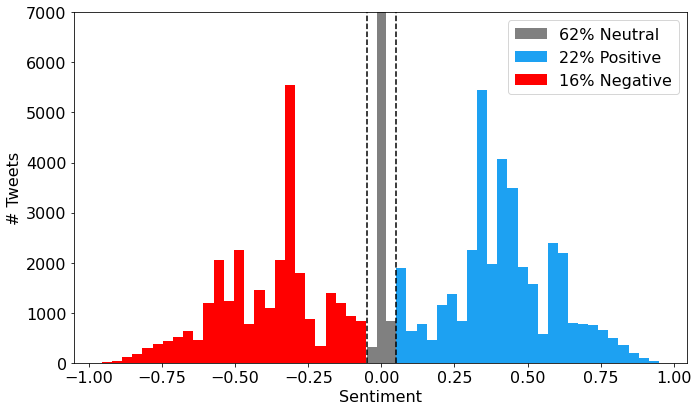

In [454]:
fig = plt.figure(figsize=(10,6))
ax = fig.subplots()
N=55
ax.hist(raw_data.polarity[(raw_data.polarity>-0.05) & (raw_data.polarity<0.05)], bins=round(N*0.1/2), color='gray', label='62% Neutral');
ax.set_ylim(0,7000)
ymin, ymax = ax.get_ylim()
ax.vlines([-0.05, 0.05], ymin=ymin, ymax=ymax, linestyles='--', color='k');
ax.hist(raw_data.polarity[raw_data.polarity>0.05], bins=round(N*0.95/2), color=twitter_color, label='22% Positive');
ax.hist(raw_data.polarity[raw_data.polarity<-0.05], bins=round(N*0.95/2), color='r', label='16% Negative');
ax.set_xlabel('Sentiment')
ax.set_ylabel('# Tweets')
ax.legend();

plt.tight_layout()
fig.savefig('sentiment_distribution.png', dpi=300, bbox_inches='tight')

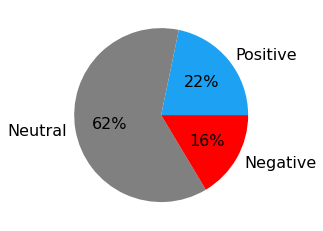

In [417]:
plt.figure()
plt.pie([37168, 105694, 28060], labels=['Positive', 'Neutral', 'Negative'], colors=[twitter_color, 'gray', 'red'], normalize=True, autopct='%.0f%%');

[Timestamp('2021-01-01 00:00:00'), Timestamp('2021-03-01 00:00:00'), Timestamp('2021-05-01 00:00:00'), Timestamp('2021-06-01 00:00:00'), Timestamp('2021-08-01 00:00:00'), Timestamp('2021-10-01 00:00:00')]
2021-11-28 00:00:00


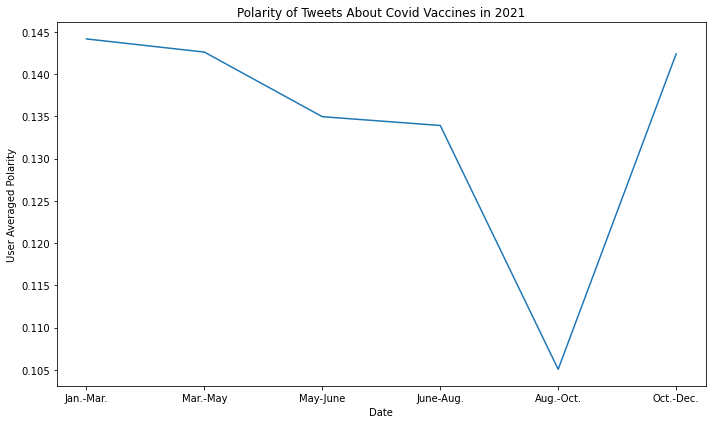

In [130]:
import datetime as dt
time_windows_1 = []
time_windows_2 = []
N=6
for i in range(1, N+1):
    time_windows_1.append(pd.Timestamp(2021, 12*i//(N+1), 1))
    time_windows_2.append(pd.Timestamp(2021, 12*i//(N+1)+ 12//(N+1), 28))

polarities = []

for i in range(len(time_windows_1)):
    time_window_1, time_window_2 = time_windows_1[i], time_windows_2[i]
    polarities.append(raw_data[((raw_data.date<time_window_2) & (raw_data.date>time_window_1))].groupby('user_name', as_index=False).agg('mean').polarity.mean())

# print(raw_data[early_filter].groupby('user_name', as_index=False).agg('mean').polarity.mean())
# print(raw_data[late_filter].groupby('user_name', as_index=False).agg('mean').polarity.mean())

plt.figure(figsize=(10,6))
plt.plot(polarities)
plt.xlabel('Date')
plt.ylabel('User Averaged Polarity');
plt.xticks([0,1,2,3,4,5], labels=['Jan.-Mar.', 'Mar.-May', 'May-June', 'June-Aug.', 'Aug.-Oct.', 'Oct.-Dec.']);
plt.title('Polarity of Tweets About Covid Vaccines in 2021');
plt.tight_layout();
# plt.savefig('polarity_over_time.png', dpi=300)

In [381]:
raw_data[['clean_text', 'polarity']]

,clean_text,polarity
0,sam folk said daikon past could tre a cytokin storm,0.0000
1,whil the world has been on the wrong sid of hist thi year hop the biggest vaccin effort we ve,-0.4767
2,russ vaccin is cre to last,0.0000
3,fact ar immut sen ev when you re not eth sturdy enough to acknowledg them you wer born,0.0000
4,explain to me again why we nee a vaccin borisjohnson matthancock,0.0000
...,...,...
212940,fin i m ful,0.0000
212941,bbchealth iron when appear to be rel saf and effect,0.0000
212944,nicaragu is on of a grow numb of country that recogn the on compon sputnik light as wel as the,-0.3400
212968,i am canad ov liv in russ i was surpr when i got the off to receiv the vaccin being a,0.0000


## Vectorization and Topic Modeling

In [382]:
import nltk

stop_words = nltk.corpus.stopwords.words('english')
stop_words += ['covid', 'cov', 'sars', 'vaccine', 'vax', 'vaccination', 'vaccinated', 'pfizer', 'moderna', 'biontech', 'pandemic', 'emergency',
              'phase', 'johnson', 'covaxin', 'sputnik']
for word in stop_words:
    if stemmer.stem(word) != word:
        stop_words.append(stemmer.stem(word))

In [383]:
from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer(stop_words=stop_words, max_df=0.3, min_df=10, max_features=1000)
# tokens = tfidf.fit_transform(raw_data.clean_text)

# tfidf_by_user = TfidfVectorizer(stop_words=stop_words, max_df=0.3, min_df=10, max_features=1000)
# tokens_by_user = tfidf_by_user.fit_transform(by_user_data.clean_text)

#negative tweets only
tfidf = TfidfVectorizer(stop_words=stop_words, max_df=0.3, min_df=10, max_features=1000)
tokens = tfidf.fit_transform(neg_tweets.clean_text)

In [203]:
# token_df = pd.DataFrame(tokens.toarray(), columns=tfidf.get_feature_names_out())
# token_df.head()

# # token_df_by_user = pd.DataFrame(tokens_by_user.toarray(), columns=tfidf_by_user.get_feature_names_out())
# # token_df_by_user.head()

In [ ]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components=200, n_iter=5, random_state=17)
lsa = tsvd.fit_transform(token_df)

tsvd_by_user = TruncatedSVD(n_components=200, n_iter=5, random_state=17)
lsa_by_user = tsvd_by_user.fit_transform(token_df_by_user)

In [ ]:
plt.plot(tsvd.explained_variance_ratio_, label='by tweet');
plt.plot(tsvd_by_user.explained_variance_ratio_, label='by user');
plt.legend();

In [ ]:
plt.plot(np.cumsum(tsvd.explained_variance_ratio_), label='by tweet');
plt.plot(np.cumsum(tsvd_by_user.explained_variance_ratio_), label='by user');
plt.legend();

In [ ]:
topic_word = pd.DataFrame(tsvd_by_user.components_, columns=tsvd_by_user.feature_names_in_)
topic_word.head()

In [ ]:
topic_word.iloc[0,:].sort_values(ascending=False, key=abs).head(10)

In [ ]:
for i in range(20):
    print('Topic {}'.format(i))
    print(topic_word.iloc[i,:].sort_values(ascending=False).head(10))
    print()

## PyLDAVis

In [384]:
import pyLDAvis
import pyLDAvis.sklearn

In [521]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, random_state=17)
lda.fit(tokens)

LatentDirichletAllocation(random_state=17)

In [522]:
pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda, tokens, tfidf)

/home/john/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.032122 -0.277561       1        1  15.905527
5     -0.099057  0.086686       2        1  11.453247
7     -0.056693 -0.005594       3        1  10.591062
3     -0.042989  0.006585       4        1  10.219770
0     -0.090493 -0.002032       5        1  10.088472
1     -0.087279  0.132326       6        1   9.464968
8     -0.081780  0.105652       7        1   9.186471
4      0.008399  0.050434       8        1   8.544142
6     -0.068997 -0.151181       9        1   7.783090
2      0.486768  0.054686      10        1   6.763250, topic_info=      Term        Freq       Total Category  logprob  loglift
522    man  764.000000  764.000000  Default  30.0000  30.0000
993   year  474.000000  474.000000  Default  29.0000  29.0000
228   died  492.000000  492.000000  Default  28.0000  28.0000
606    old  444.000000  444.000000  Default  27.0000  27.0000
362   good  437.000000  437.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
789  shock    8.827280   50.096787  Topic10  -6.2155   0.9576
829     st   25.536447  195.020094  Topic10  -5.1532   0.6607
339   four    7.064200   38.176760  Topic10  -6.4383   1.0065
126    cas   22.943168  263.529837  Topic10  -5.2603   0.2525
37     amp   20.285697  501.495599  Topic10  -5.3834  -0.5140

[589 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
5         2  0.079950     accord
5         3  0.319802     accord
5         7  0.039975     accord
5         9  0.099938     accord
5        10  0.459715     accord
...     ...       ...        ...
993       8  0.002107       year
993      10  0.971533       year
994       1  0.979183  yesterday
994       5  0.015300  yesterday
998      10  0.971694         yr

[1609 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 6, 8, 4, 1, 2, 9, 5, 7, 3])

In [511]:
neg_tweets2.text

0                While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm
1              while deaths are closing in on the 300,000 mark... millions of people wait #PfizerBioNTech #Vaccine !\n-\nThe first U… https://t.co/uQ3A2f7SVP
2                .@Pfizer will rake in billions from its expensive #CovidVaccine but @AlbertBourla refuses to cut the price for lowe… https://t.co/eC94w3TUl0
3                    The trump administration failed to deliver on vaccine promises, *shocker* #COVIDIOTS #coronavirus #CovidVaccine… https://t.co/hew6eHTUrD
4              No.1 of 2 done.\n\n#ThankYouNHS @NHSuk @MHRAgovuk and #PfizerBioNTech @pfizer for making the #CovidVaccine dream poss… https://t.co/3KvJ7UP432
                                                                                 ...                                                                         
28055            @Kasparov63 “… Russia was quick to 

In [523]:
# make doc_topic matrix and add max topic column
doc_topic = pd.DataFrame(lda.transform(tokens))
doc_topic['user_name'] = neg_tweets['user_name'].values
doc_topic['clean_text'] = neg_tweets['clean_text'].values
doc_topic['text'] = neg_tweets['text'].values
doc_topic['max_topic'] = np.zeros(len(doc_topic))
for i, row in enumerate(doc_topic.iterrows()):
    doc_topic.loc[i, 'max_topic'] = np.argmax(row[1][:10])
    
doc_topic.head()

,0,1,2,3,4,5,6,7,8,9,user_name,clean_text,text,max_topic
0,0.215439,0.026572,0.026713,0.026571,0.026571,0.379327,0.026578,0.219046,0.026573,0.026611,Albert Fong,whil the world has been on the wrong sid of hist thi year hop the biggest vaccin effort we ve,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",5.0
1,0.029368,0.029332,0.029328,0.029349,0.735905,0.029344,0.029337,0.029336,0.029341,0.029359,Tamer Yazar,whil death ar clos in on the mark mil of peopl wait the first,"while deaths are closing in on the 300,000 mark... millions of people wait #PfizerBioNTech #Vaccine !\n-\nThe first U… https://t.co/uQ3A2f7SVP",4.0
2,0.391332,0.033379,0.033370,0.033411,0.033372,0.033377,0.171048,0.203967,0.033372,0.033373,Braderz73🌹#GTTO 🇪🇺 🇬🇧,pfiz wil rak in bil from it expend but albertbourl refus to cut the pric for,.@Pfizer will rake in billions from its expensive #CovidVaccine but @AlbertBourla refuses to cut the price for lowe… https://t.co/eC94w3TUl0,0.0
3,0.031062,0.262578,0.031058,0.031057,0.031068,0.488956,0.031054,0.031057,0.031057,0.031054,Alex Vie,the trump admin fail to del on vaccin prom shock,"The trump administration failed to deliver on vaccine promises, *shocker* #COVIDIOTS #coronavirus #CovidVaccine… https://t.co/hew6eHTUrD",5.0
4,0.549938,0.050008,0.050000,0.050009,0.050000,0.050012,0.050004,0.050012,0.050011,0.050006,Devan Surendran,no of don nhsuk mhragovuk and pfiz for mak the dream,No.1 of 2 done.\n\n#ThankYouNHS @NHSuk @MHRAgovuk and #PfizerBioNTech @pfizer for making the #CovidVaccine dream poss… https://t.co/3KvJ7UP432,0.0


In [524]:
for topic in np.sort(doc_topic.max_topic.unique()):
    print('Topic {}'.format(topic+1))
    print(doc_topic.sort_values(by=[topic], ascending=False).text.head(20))
#     print(doc_topic[doc_topic.max_topic==topic].text.head(20))
    print()

Topic 1.0
9941                                        @POTUS Hi, Mr Biden do that apply for us part time workers because my last shot made me sick #Moderna vaccine .
25381      Well said! \n\n"Wait, vaccines don't stop the spread like we thought it would"\n\n"No, a vaxxed person can still spread… https://t.co/18WoyleTie
15901    What's more shocking is...even many doctors towing govt &amp; pharma's line saying #vaccine is 100% safe.\n\nShame on suc… https://t.co/kRJ9wQawIg
12250           Ban such people from politics, and basic rights. #humanitylost What is the real dosage time? Daily new updates are… https://t.co/1To2av8XIa
26580            @nytimes God damn you #Moderna When will #BigPharma start acting like it gives a shit about human beings &amp; not just fucking profits???
12886     Turns out Trypanophobia(fear of needles &amp; medical procedures)doesn't just go away with time.\nBut safe to say,I surv… https://t.co/5yA3ZW3WA4
27281          Thailand's Health Ministry said Monday 

/home/john/anaconda3/envs/metis/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/john/anaconda3/envs/metis/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/john/anaconda3/envs/metis/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/john/anaconda3/envs/metis/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


## Hashtag Analysis

In [491]:
from collections import defaultdict

In [492]:
important_hashtags = ['vaccinesideeffects', 'bigpharma', 'sideeffects', 'myocarditis', 'covidiots', 'antivaxxers', 'billgates', 'chinesevirus', 'bloodclots', 'cancer', 'jab',
                     'chinesevaccine', 'covididiots', 'antivax', 'chinavirus', 'covidvaccinevictims', 'vaccinevictims']
important_hashtags.sort()

In [463]:
neg_tweets

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,clean_text,polarity
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",NaN,Twitter Web App,1,1,False,whil the world has been on the wrong sid of hist thi year hop the biggest vaccin effort we ve,-0.4767
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (freelance) for some companies that need analysis for their products in Int. Markets \n- Instagram : tamervisits -",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mark... millions of people wait #PfizerBioNTech #Vaccine !\n-\nThe first U… https://t.co/uQ3A2f7SVP","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,whil death ar clos in on the mark mil of peopl wait the first,-0.5994
18,1337781178665816064,Braderz73🌹#GTTO 🇪🇺 🇬🇧,"Bristol, UK","One of those lefty types, I believe in a fairer future for all. I also luv throwin' myself down steep trails on my MTB! Ex-Labour.\n\n#DisabilityRights",2012-07-24 08:18:51,6430,6292,45007,False,2020-12-12 15:27:42,.@Pfizer will rake in billions from its expensive #CovidVaccine but @AlbertBourla refuses to cut the price for lowe… https://t.co/eC94w3TUl0,['CovidVaccine'],Twitter for Android,3,3,False,pfiz wil rak in bil from it expend but albertbourl refus to cut the pric for,-0.3919
19,1337776763384958976,Alex Vie,"Los Angeles, CA",Marine vet. Yogi. Krav Maga. Runner. Climber. Cyclist. 📷: artificer.vx 👻: QxGambit,2010-01-24 04:43:57,125,442,5401,False,2020-12-12 15:10:09,"The trump administration failed to deliver on vaccine promises, *shocker* #COVIDIOTS #coronavirus #CovidVaccine… https://t.co/hew6eHTUrD","['COVIDIOTS', 'coronavirus', 'CovidVaccine']",Twitter for iPhone,0,0,False,the trump admin fail to del on vaccin prom shock,-0.7269
25,1337770118017900550,Devan Surendran,"Nottingham, England","NHS Doctor | Singer | Travel, nature and dog lover!",2010-01-16 23:59:43,116,86,268,False,2020-12-12 14:43:45,No.1 of 2 done.\n\n#ThankYouNHS @NHSuk @MHRAgovuk and #PfizerBioNTech @pfizer for making the #CovidVaccine dream poss… https://t.co/3KvJ7UP432,"['ThankYouNHS', 'PfizerBioNTech', 'CovidVaccine']",Twitter Web App,1,10,False,no of don nhsuk mhragovuk and pfiz for mak the dream,-0.0516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212898,1449595574253244417,Ramona,NaN,NaN,2010-10-16 16:40:24,653,2314,42068,False,2021-10-17 04:38:11,@Kasparov63 “… Russia was quick to develop and launch its #SputnikV vaccine when the coronavirus pandemic struck la… https://t.co/TETkWxQSBF,['SputnikV'],Twitter for iPhone,0,0,False,kasparov russ was quick to develop and launch it vaccin when the coronavir pandem struck,-0.2500
212919,1449400390852571139,Николай Михайлович Димитров,"Тачикава, Токио, Нихон",#Ethical_Vegan #bio #organic \n#Caturday #Animal_Liberation #human_rights #ally #LGBTs \n#Veganuary #Ethical_Diet\n#LiveVegan #GoVegan,2017-07-18 01:34:23,75,278,479,False,2021-10-16 15:42:36,【🇷🇺】Both #Pfizer &amp; #Moderna\n#vaxx deserve to be injected no\nlonger because of #myocarditis\n\nFor the sake of safe va… https://t.co/APM3d0zEa3,"['Pfizer', 'Moderna', 'vaxx', 'myocarditis']",Twitter for Android,0,0,False,both amp deserv to be inject no long becaus of for the sak of saf,-0.2960
212930,1449363899787227136,Richard usen ⭐⭐,NaN,NaN,2019-02-21 23:08:55,257,886,8573,False,2021-10-16 13:17:36,Russia records highest covid deaths in a single day.https://t.co/agB72GWjyb\n#coronavirus #COVID19 #SputnikV #Corona #DeltaVariant,"['co

/home/john/anaconda3/envs/metis/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/john/anaconda3/envs/metis/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/john/anaconda3/envs/metis/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/john/anaconda3/envs/metis/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [493]:
count = 0
for tag in important_hashtags:
    neg_tweets2.loc[:,tag] = np.zeros(len(neg_tweets2))
    for i, tags in enumerate(neg_tweets2.hashtags):
        if type(tags)==str:
            if tag in tags.lower():
#                 print('set {i}, {tag} = 1'.format(i=i, tag=tag))
                count +=1
                neg_tweets2.loc[i,tag] = 1
print(count)
            
# neg_tweets[important_hashtags+['hashtags']]

650


In [485]:
print(len(neg_tweets2))
print(len(neg_tweets2[neg_tweets2.hashtags!=neg_tweets2.hashtags]))

28060
6704


In [495]:
print(650/6704)

0.09695704057279236


In [502]:
tag_counts = []
for tag in important_hashtags:
    tag_counts.append(len(neg_tweets2[neg_tweets2[tag]==1]))
    print('{}: {}'.format(tag, len(neg_tweets2[neg_tweets2[tag]==1])))
    
tags_and_counts = list(zip(tag_counts, important_hashtags))

antivax: 36
antivaxxers: 17
bigpharma: 52
billgates: 23
bloodclots: 30
cancer: 19
chinavirus: 14
chinesevaccine: 16
chinesevirus: 18
covididiots: 5
covidiots: 27
covidvaccinevictims: 11
jab: 54
myocarditis: 43
sideeffects: 83
vaccinesideeffects: 45
vaccinevictims: 157


In [505]:
tags_and_counts.sort(reverse=True)

In [507]:
for count, tag in tags_and_counts:
    print('{}: {}'.format(tag, count))

vaccinevictims: 157
sideeffects: 83
jab: 54
bigpharma: 52
vaccinesideeffects: 45
myocarditis: 43
antivax: 36
bloodclots: 30
covidiots: 27
billgates: 23
cancer: 19
chinesevirus: 18
antivaxxers: 17
chinesevaccine: 16
chinavirus: 14
covidvaccinevictims: 11
covididiots: 5


In [508]:
for tag in important_hashtags:
    print(tag)
    print(neg_tweets2[neg_tweets2[tag]==1].text)
    print()

antivax
140           #Antivax: Figure out a way to "green our vaccines" make them without aluminum.\n#PfizerBioNTech Ok. Here you go. No… https://t.co/voduuzaPPj
1676       #ZimVaccination \n#Sinopharm \n\nThe sad reality of it all is that #antivaxxers will silently go and get the jab becau… https://t.co/fIp00e1qOk
5887                      The irony......#antivaxxer #Covid19UK #AstraZeneca #Moderna #vaccinated #VaccinesWork #grifter #vaccine… https://t.co/kH8jh1sF4H
6304              ....\nSometimes no need much words to describe things...\n#vaccine #antivax #pfizer #PfizerGang #PfizerBiontech… https://t.co/2MPNJ9mFmI
6646          Controversial claims over risks posed by #OxfordAstraZeneca are fuelling #antivax sentiment in Africa, African mini… https://t.co/hGcO2wR8np
9480                          Y’all anti vaxxers are a MESS. Grow tf up. #AntiVaccine #antivaxxers #robschneider #Pfizer #Moderna… https://t.co/AgIYhTisgU
10159            Remember that time you got polio ? \nNo you d

In [543]:
neg_tweets2[neg_tweets2['vaccinevictims']==1].text[100:150]

23534    vaccine victims report https://t.co/MjdXnYisqi &amp; https://t.co/UTjxOp3noO #VaccineVictims #Pfizer #Moderna… https://t.co/Nh1UM2Tgv2
23535    vaccine victims report https://t.co/MjdXnYisqi &amp; https://t.co/UTjxOp3noO #VaccineVictims #Pfizer #Moderna… https://t.co/wd4s5RXiHX
23536    vaccine victims report https://t.co/MjdXnYisqi &amp; https://t.co/UTjxOp3noO #VaccineVictims #Pfizer #Moderna… https://t.co/sqzhhSf7GZ
23537    vaccine victims report https://t.co/MjdXnYisqi &amp; https://t.co/UTjxOp3noO #VaccineVictims #Pfizer #Moderna… https://t.co/IJgkiNpqy5
23538    vaccine victims report https://t.co/MjdXnYisqi &amp; https://t.co/UTjxOp3noO #VaccineVictims #Pfizer #Moderna… https://t.co/pWu1cepB8a
23539    vaccine victims report https://t.co/MjdXnYisqi &amp; https://t.co/UTjxOp3noO #VaccineVictims #Pfizer #Moderna… https://t.co/JQyZFrcRKy
23540    vaccine victims report https://t.co/MjdXnYisqi &amp; https://t.co/UTjxOp3noO #VaccineVictims #Pfizer #Moderna… https://t.co/sal

In [516]:
for tag in important_hashtags:
    top_topic = doc_topic[neg_tweets2[tag]==1]['max_topic'].value_counts().sort_values(ascending=False).index[0]+1
    print('{}: {}'.format(tag,top_topic))

antivax: 6.0
antivaxxers: 6.0
bigpharma: 1.0
billgates: 5.0
bloodclots: 7.0
cancer: 7.0
chinavirus: 8.0
chinesevaccine: 6.0
chinesevirus: 8.0
covididiots: 6.0
covidiots: 6.0
covidvaccinevictims: 1.0
jab: 10.0
myocarditis: 8.0
sideeffects: 10.0
vaccinesideeffects: 10.0
vaccinevictims: 6.0


In [517]:
tag_topics = []
for tag in important_hashtags:
    tag_topics.append(doc_topic[neg_tweets2[tag]==1]['max_topic'].value_counts().sort_values(ascending=False).index[0]+1)
    
tags_and_topics = list(zip(tag_topics, important_hashtags))

In [518]:
tags_and_topics.sort()
tags_and_topics

[(1.0, 'bigpharma'),
 (1.0, 'covidvaccinevictims'),
 (5.0, 'billgates'),
 (6.0, 'antivax'),
 (6.0, 'antivaxxers'),
 (6.0, 'chinesevaccine'),
 (6.0, 'covididiots'),
 (6.0, 'covidiots'),
 (6.0, 'vaccinevictims'),
 (7.0, 'bloodclots'),
 (7.0, 'cancer'),
 (8.0, 'chinavirus'),
 (8.0, 'chinesevirus'),
 (8.0, 'myocarditis'),
 (10.0, 'jab'),
 (10.0, 'sideeffects'),
 (10.0, 'vaccinesideeffects')]

In [182]:
hashtags = defaultdict(int)

for tags in neg_tweets.hashtags:
    if tags == tags:
        for tag in tags[1:-2].replace("'", '').lower().split(', '):
            hashtags[tag] += 1

hashtags = pd.Series(hashtags)
hashtags.sort_values(ascending=False)[:50]

moderna                 7128
covaxin                 4674
covid19                 2702
pfizer                  2218
sputnikv                2052
vaccine                 1997
sinopharm               1740
sinovac                 1389
pfizerbiontech           858
covid                    830
covidvaccine             781
astrazeneca              746
covishield               625
oxfordastrazeneca        575
vaccines                 532
coronavirus              397
vaccinated               393
vaccination              324
india                    322
china                    306
who                      293
covid19vaccine           281
deltavariant             276
bharatbiotech            263
russia                   247
mrna                     238
auspol                   220
scottyfrommarketing      208
eu                       203
coronavirusaustralia     201
canada                   196
fda                      190
pfizervaccine            185
johnsonandjohnson        156
covid_19      

# Clustering

In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=17, max_iter=300, n_init=4)

mds_projection = mds.fit_transform(lsa[:1000])

plt.scatter(mds_projection[:,0], mds_projection[:,1])

In [17]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import MiniBatchKMeans

norm = Normalizer()
lsa_n = norm.fit_transform(lsa)

km = MiniBatchKMeans(n_clusters=10, random_state=17)
clusters = km.fit_transform(lsa_n)

# Networking

In [ ]:
import networkx as nx
